# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [3]:
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np

## Loading data

In [31]:
dataaset = xr.open_mfdataset('Z:\\Teris\\ASAP\\expt_sessions\\RE603*\\processed\\xr_session.nc',
                             combine='nested', engine='h5netcdf')

In [3]:
f1 = r'Z:/Teris/ASAP/expt_sessions/RE603-2023-03-24-083953/processed/xr_session.nc'
f2 = r'Z:/Teris/ASAP/expt_sessions/RE603-2023-03-21-152900/processed/xr_session.nc'

d1= xr.open_dataset(f1)
d2  = xr.open_dataset(f2)

In [4]:
from glob import glob
fns = glob(r'Z:/Teris/ASAP/expt_sessions/kms064*/processed/xr_session.nc')

In [3]:
ds_combined = xr.open_mfdataset(r'Z:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc',
                                concat_dim='session', combine='nested', decode_times=False)

In [4]:
def drop_all_coords(ds):
    return ds.reset_coords(drop=True)

ds_combined = xr.open_mfdataset(r'Z:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc',
                                concat_dim='session', combine='nested', engine='h5netcdf', data_vars='minimal', coords='minimal', compat='override')

In [ ]:
def drop_all_coords(ds):
    return ds.reset_coords(drop=True)

ds_combined = xr.open_mfdataset(r'Z:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc',
                                concat_dim='session', combine='nested', engine='h5netcdf', preprocess=drop_all_coords)

In [31]:
from glob import glob

def read_netcdfs(files, dim, data_vars=None, dropna_var:list=None):
    # glob expands paths with * to a list of files, like the unix shell
    paths = sorted(glob(files))
    ds_list = []
    for p in tqdm(paths):
        ds = xr.open_dataset(p)
        if data_vars is not None:
            try:
                ds=ds[data_vars]
            except KeyError:
                print(f'Error encounter for {p}. skipping this session')
                continue
        
        if dropna_var is not None:
            ds = ds.dropna(dim='time', subset=dropna_var)
            # display(ds)
        
        ds_list.append(ds)
        
    combined = xr.concat(ds_list, dim)
    
    return combined

combined = read_netcdfs(r'Z:/Teris/ASAP/expt_sessions/RE*/processed/xr_session.nc',
                        data_vars =['rel_time_hold_for_water','analog_1_df_over_f','success'], dim='session', dropna_var = ['rel_time_hold_for_water'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.42it/s]


In [45]:
from glob import glob

def dataset2df(files, data_vars=None, dropna_var:list=None):
    # Combined and convert dataset to dataframe
    paths = sorted(glob(files))
    ds_list = []
    for p in tqdm(paths):
        ds = xr.open_dataset(p)
        if data_vars is not None:
            try:
                ds=ds[data_vars]
            except KeyError:
                print(f'Error encounter for {p}. skipping this session')
                continue
        
        if dropna_var is not None:
            ds = ds.dropna(dim='time', subset=dropna_var).to_dataframe()
            # display(ds)
        
        ds_list.append(ds)
        
    combined = pd.concat(ds_list).reset_index()
    
    return combined

combined = dataset2df(r'Y:/Teris/ASAP/expt_sessions/kms*/processed/xr_session.nc',
                        data_vars =['rel_time_hold_for_water','analog_1_df_over_f','success'], dropna_var = ['rel_time_hold_for_water'])

 61%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                               | 64/105 [00:30<00:13,  3.03it/s]

Error encounter for Z:/Teris/ASAP/expt_sessions\kms063-2023-02-28-102214\processed\xr_session.nc. skipping this session


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 104/105 [00:48<00:00,  3.08it/s]

Error encounter for Z:/Teris/ASAP/expt_sessions\kms064-2023-03-03-102930\processed\xr_session.nc. skipping this session


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:49<00:00,  2.14it/s]


In [46]:
combined

,time,rel_time_hold_for_water,analog_1_df_over_f,success
0,13838.5,-2000.0,0.001549,True
1,13888.5,-1950.0,0.018423,True
2,13938.5,-1900.0,0.008504,True
3,13988.5,-1850.0,0.006287,True
4,14038.5,-1800.0,0.013307,True
...,...,...,...,...
1735178,3279799.5,3350.0,-0.011471,False
1735179,3279849.5,3400.0,-0.014981,False
1735180,3279899.5,3450.0,-0.018860,False
1735181,3279949.5,3500.0,-0.001239,False


<AxesSubplot: xlabel='rel_time_hold_for_water', ylabel='analog_1_df_over_f'>

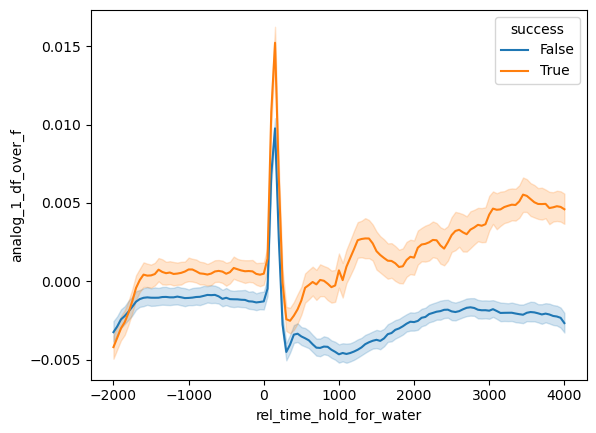

In [47]:
sns.lineplot(x='rel_time_hold_for_water',hue='success',
            y='analog_1_df_over_f', data=combined)

## Trying to reformat the data

In [2]:
fn = glob(r'Y:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc')
ds = xr.open_dataset(fn[0])

NameError: name 'glob' is not defined

In [63]:
ds['analog_1_df_over_f'].groupby('

ValueError: cannot add coordinates with new dimensions to a DataArray

In [58]:
da = xr.DataArray(np.random.rand(5,10), dims=('x','y'))
da

<xarray.DataArray (x: 5, y: 10)>
array([[0.9561407 , 0.45854431, 0.58064574, 0.42747966, 0.64163827,
        0.18136527, 0.07184296, 0.23419763, 0.75146231, 0.88421056],
       [0.3331848 , 0.90078933, 0.02234657, 0.35304591, 0.70020465,
        0.7100286 , 0.29703936, 0.34972005, 0.28409764, 0.63010516],
       [0.45631275, 0.55099025, 0.96005696, 0.87815813, 0.40385273,
        0.11511593, 0.5770841 , 0.17512445, 0.52832187, 0.31997664],
       [0.7481169 , 0.44009714, 0.01045057, 0.70498502, 0.08504624,
        0.89147538, 0.61033136, 0.38389074, 0.91153   , 0.47936716],
       [0.41065822, 0.79253787, 0.00944618, 0.44613766, 0.30422412,
        0.72925611, 0.11336311, 0.86681248, 0.49782306, 0.17364672]])
Dimensions without coordinates: x, y

### Testing

In [23]:
fn = glob(r'Z:/Teris/ASAP/expt_sessions/kms058*/processed/xr_session.nc')
ds = xr.open_dataset(fn[0])
ds[['rel_time_hold_for_water','analog_1_df_over_f','success']]

<xarray.Dataset>
Dimensions:                  (time: 48850)
Coordinates:
  * time                     (time) float64 6.638e+03 6.688e+03 ... 2.449e+06
Data variables:
    rel_time_hold_for_water  (time) float64 ...
    analog_1_df_over_f       (time) float64 ...
    success                  (time) bool ...

In [24]:
ds1 =ds.dropna(dim='time',subset=['rel_time_hold_for_water'])

In [26]:
xr.concat([ds1,ds1], dim='new_dim')

<xarray.Dataset>
Dimensions:                  (time: 20965, new_dim: 2)
Coordinates:
  * time                     (time) float64 1.384e+04 1.389e+04 ... 2.311e+06
Dimensions without coordinates: new_dim
Data variables: (12/26)
    trial_nb                 (new_dim, time) int16 4 4 4 4 4 ... 170 170 170 170
    uid                      (new_dim, time) object 'kms058_2023-02-20_12:04:...
    trigger                  (new_dim, time) object 'hold_for_water' ... 'hol...
    valid                    (new_dim, time) bool True True True ... True True
    break_after_abort        (new_dim, time) bool False False ... False False
    US_end_timer             (new_dim, time) bool True True True ... False False
    ...                       ...
    analog_1_filt            (new_dim, time) float64 0.2416 0.2454 ... 0.225
    analog_2_filt            (new_dim, time) float64 0.3757 0.3751 ... 0.3546
    analog_1_df_over_f       (new_dim, time) float64 0.001549 ... -0.02475
    rel_time_hold_for_water  (new_dim, time) float64 -2e+03 -1.95e+03 ... 4e+03
    rel_time_first_bar_off   (new_dim, time) float64 nan nan nan ... nan nan nan
    rel_time_spout           (new_dim, time) float64 nan nan nan ... nan nan nan

<AxesSubplot: xlabel='rel_time_hold_for_water', ylabel='analog_1_df_over_f'>

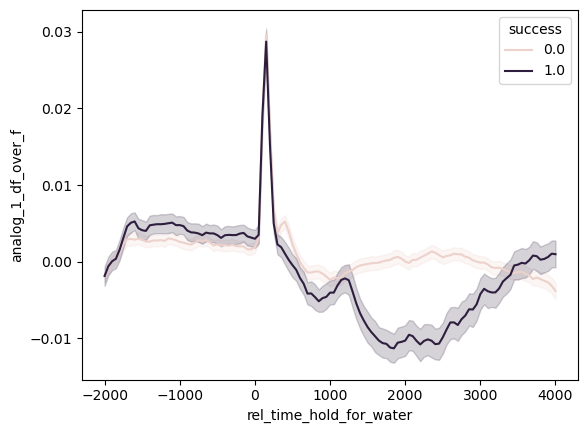

In [8]:
df2plot=ds_combined[['rel_time_hold_for_water','analog_1_df_over_f','success']].to_dataframe().reset_index()
sns.lineplot(x='rel_time_hold_for_water',hue='success',
            y='analog_1_df_over_f', data=df2plot)

In [ ]:
ds_combined = xr.concat(ds_all, pd.Index(session_id, name='session_id'), data_vars=['analog_1_df_over_f'])


NameError: name 'ds_all' is not defined

In [ ]:
import xarray as xr

# define some sample data arrays to concatenate
data_arr1 = xr.DataArray([[1, 2], [3, 4]], dims=('x', 'y'), name='data1')
data_arr2 = xr.DataArray([[5, 6], [7, 8]], dims=('x', 'y'), name='data2')

# concatenate along the x dimension and include only one variable 'data1' 
concatenated = xr.concat([data_arr1, data_arr2], dim='x', data_vars=['data1'])

# print the resulting concatenated DataArray
print(concatenated)


ValueError: data_vars is not a valid argument when concatenating DataArray objects